<a href="https://colab.research.google.com/github/jonathannovs/Projetos/blob/main/PMF_03_Mod_02_Consolida%C3%A7%C3%A3o_de_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

---
# **Módulo 02 - Manipulação de Dados com Pandas**
---

# 3. Consolidação de dataframes

## 3.1. Obtenção de dados

**ATENÇÃO**

Em caso de não funcionamento da biblioteca tvdatafeed, utilize o arquivo Excel que foi disponibilizado junto a aula 19 deste módulo.

In [ ]:
!pip install yfinance
#!pip install --upgrade --no-cache-dir git+https://github.com/StreamAlpha/tvdatafeed.git         ########## SAIU DO AR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
#from tvDatafeed import TvDatafeed, Interval

In [ ]:
petr4_ohlc = yf.download('PETR4.SA', period = 'max')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
petr4_ohlc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.506322,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.422992,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.408635,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.403763,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.410173,20912640000


In [ ]:
petr4_dividendos = yf.Ticker('PETR4.SA').dividends

In [ ]:
petr4_dividendos.index

DatetimeIndex(['2005-04-01 00:00:00-03:00', '2005-07-01 00:00:00-03:00',
               '2006-01-02 00:00:00-02:00', '2006-04-04 00:00:00-03:00',
               '2006-11-01 00:00:00-03:00', '2007-01-02 00:00:00-02:00',
               '2007-04-03 00:00:00-03:00', '2007-08-20 00:00:00-03:00',
               '2007-10-08 00:00:00-03:00', '2008-01-14 00:00:00-02:00',
               '2008-04-07 00:00:00-03:00', '2008-12-29 00:00:00-02:00',
               '2009-04-09 00:00:00-03:00', '2009-07-06 00:00:00-03:00',
               '2009-10-01 00:00:00-03:00', '2009-12-21 00:00:00-02:00',
               '2010-04-23 00:00:00-03:00', '2010-05-24 00:00:00-03:00',
               '2010-08-02 00:00:00-03:00', '2010-11-03 00:00:00-02:00',
               '2010-12-22 00:00:00-02:00', '2011-03-22 00:00:00-03:00',
               '2011-04-29 00:00:00-03:00', '2011-05-12 00:00:00-03:00',
               '2011-08-03 00:00:00-03:00', '2011-11-14 00:00:00-02:00',
               '2012-01-03 00:00:00-02:00', '2012-0

In [ ]:
petr4_dividendos.index = pd.to_datetime(petr4_dividendos.index.date)  #selecionando apenas a data para o index

In [ ]:
petr4_dividendos.head()

2005-04-01    0.133288
2005-07-01    0.250663
2006-01-02    0.259000
2006-04-04    0.132700
2006-11-01    0.500750
Name: Dividends, dtype: float64

Agora vamos capturar os dados do IBOV

In [ ]:
ibov_yf = yf.download('^BVSP', start = '2015-01-01', auto_adjust= True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibov_yf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900


In [ ]:
ibov_yf = ibov_yf.rename(columns = str.lower)   #RENOMEANDO AS COLUNAS PARA FICAR COM NOME MINUSCULO

Agora vamos utilizar a TVDataFeed, que extrai dados do Trading View, para capturar os dados do IBOV

In [ ]:
#########3 BIBLIOTECA SAIU DO AR

In [ ]:
#ibov_tv = TvDatafeed().get_hist(symbol='IBOV', exchange='BMFBOVESPA', interval=Interval.in_daily, n_bars=10000)

In [ ]:
#ibov_tv = ibov_tv.loc['2015-01-01':]

In [ ]:
#ibov_tv.index = pd.to_datetime(ibov_tv.index.date)

In [ ]:
#ibov_tv.index.name = 'Date'

In [ ]:
#ibov_tv.head()

Caso você tenha problemas com a extração dos dados através das bibliotecas, utilize o arquivo Excel disponibilizado nesta aula.

In [ ]:
# Obter usando arquivo Excel

ibov_yf = pd.read_excel('/content/drive/MyDrive/NOTEBOOKS CURSOS/PMF/MOD_2_PANDAS_MANIPULACAO/dados_concatenar_dfs.xlsx', sheet_name='ibov_yf', index_col='Date', parse_dates=True)
ibov_tv = pd.read_excel('/content/drive/MyDrive/NOTEBOOKS CURSOS/PMF/MOD_2_PANDAS_MANIPULACAO/dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col=0, parse_dates=True)
petr4_ohlc = pd.read_excel('/content/drive/MyDrive/NOTEBOOKS CURSOS/PMF/MOD_2_PANDAS_MANIPULACAO/dados_concatenar_dfs.xlsx', sheet_name='petr4_ohlc', index_col='Date', parse_dates=True)
petr4_dividendos = pd.read_excel('/content/drive/MyDrive/NOTEBOOKS CURSOS/PMF/MOD_2_PANDAS_MANIPULACAO/dados_concatenar_dfs.xlsx', sheet_name='petr4_dividends', index_col=0, parse_dates=True)

In [ ]:
ibov_tv.head()

,symbol,open,high,low,close,volume
Date,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0


In [ ]:
ibov_tv.index = pd.to_datetime(ibov_tv.index.date)

In [ ]:
ibov_tv.index.name = 'Date'

In [ ]:
ibov_tv.head()

,symbol,open,high,low,close,volume
Date,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0


## 3.2. Comparação se os dataframes são iguais

Checar simplesmente se são iguais ou não

In [ ]:
pd.DataFrame.equals(ibov_yf, ibov_tv)      #checando se dois dataframes são iguais

False

In [ ]:
pd.DataFrame.equals(ibov_yf[['open', 'close']] , ibov_tv[['open', 'close']])  #comparando colunas dos dataframes

False

In [ ]:
pd.DataFrame.equals(ibov_yf[['open', 'close']] , ibov_yf[['open', 'close']])

True

Checar quais colunas são diferentes

In [ ]:
set(ibov_yf).symmetric_difference(ibov_tv)   # vendo as colunas diferentes

{'symbol'}

Checar o que tem no df1 e não tem no df2 (nesse exemplo baseado no index)

In [ ]:
ibov_yf[~ibov_yf.index.isin(ibov_tv.index)]      # retorna o que não tem no outro dataframe

,open,high,low,close,volume
Date,,,,,
2017-12-29,76077,76437,76077,76402,0


## 3.3. Função merge

**A função merge é similar ao PROCV (VLOOKUP) do Excel**

Operação realizada para unir dois dataframes diferentes.

Estes dataframes podem ou não conter dados para os mesmos indivíduos, observações  ou datas, por isso é necessário especificar qual tipo de join vamos aplicar.


<img src="https://alishoff.com/media/uploads/files/joins.png" width="500" align="left"/>

<img src="https://i0.wp.com/www.datascienceexamples.com/wp-content/uploads/2019/12/joins_with_pandas.png?resize=1024%2C554&ssl=1" width="500" align="left"/>

In [ ]:
petr4_ohlc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,5.550,5.550,5.550,5.550,1.768468,28861440000
2000-01-05,5.494,5.494,5.494,5.494,1.750624,43033600000
2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


In [ ]:
petr4_dividendos.head()

,Dividends
2005-04-01,0.133288
2005-07-01,0.250663
2006-01-02,0.259000
2006-04-04,0.132700
2006-11-01,0.500750


Usar o right join para manter apenas fechamentos em que houve pagamento de dividendos

In [ ]:
df_merge_close_div = pd.merge(petr4_ohlc['Close'],  petr4_dividendos, how = 'right', left_index = True, right_index = True)
# fazendo o merge com dois dataframes
# passando left_index e right_join para usar como refernecia para fazer o join, usar os indices dos dataframes como referencia
# manteve tudo do df da direita com o how='right'

In [ ]:
df_merge_close_div.head()

,Close,Dividends
2005-04-01,12.98750,0.133288
2005-07-01,13.52375,0.250663
2006-01-02,19.04500,0.259000
2006-04-04,21.64500,0.132700
2006-11-01,21.22500,0.500750


Usar o "outer join" para checar dados presente em apenas um dos dataframes, utilizando o indicator=True

In [ ]:
df_merge_yf_tv = pd.merge(ibov_yf['close'],  ibov_tv['close'], how = 'outer', left_index = True, right_index = True, indicator = True)
#comparando diferenças entre dataframes

In [ ]:
df_merge_yf_tv.head()

,close_x,close_y,_merge
Date,,,
2015-01-02,48512.0,48512.219,both
2015-01-05,47517.0,47516.820,both
2015-01-06,48001.0,48000.922,both
2015-01-07,49463.0,49462.910,both
2015-01-08,49943.0,49943.301,both


Datas divergentes entre os dois dataframes (em todas não houve pregões)

In [ ]:
df_merge_yf_tv[df_merge_yf_tv['_merge'] != 'both']  # encontrando diferenças entre dfs

,close_x,close_y,_merge
Date,,,
2017-12-29,76402.0,NaN,left_only
2018-11-20,NaN,87900.828,right_only
2020-11-20,NaN,106042.480,right_only


Para exemplificar os parâmetros "on" e "suffixes" vamos editar os dados dos dfs

In [ ]:
ibov_yf['Data'] = ibov_yf.index
ibov_tv['Data'] = ibov_tv.index

In [ ]:
ibov_yf.head()

,open,high,low,close,volume,Data
Date,,,,,,
2015-01-02,50005,50005,48345,48512,2882100,2015-01-02
2015-01-05,48512,48512,47264,47517,3866100,2015-01-05
2015-01-06,47517,48061,47338,48001,4559300,2015-01-06
2015-01-07,48006,49882,48006,49463,4408800,2015-01-07
2015-01-08,49463,50261,49017,49943,3621900,2015-01-08


In [ ]:
ibov_tv.head()

,symbol,open,high,low,close,volume,Data
Date,,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0,2015-01-02
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0,2015-01-05
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0,2015-01-06
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0,2015-01-07
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0,2015-01-08


In [ ]:
df_merge_yf_tv2 = pd.merge(ibov_yf[['Data', 'close']],  ibov_tv[['Data', 'close']], how = 'inner', on = 'Data', suffixes = ['_yf','_tv'])

In [ ]:
df_merge_yf_tv2.head()

,Data,close_yf,close_tv
0,2015-01-02,48512,48512.219
1,2015-01-05,47517,47516.820
2,2015-01-06,48001,48000.922
3,2015-01-07,49463,49462.910
4,2015-01-08,49943,49943.301


## 3.4. Concatenar dataframes

In [ ]:
# Obter usando arquivo Excel

#ibov_yf = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_yf', index_col='Date', parse_dates=True)
#ibov_tv = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='ibov_tv', index_col=0, parse_dates=True)
#petr4_ohlc = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_ohlc', index_col='Date', parse_dates=True)
#petr4_dividendos = pd.read_excel('dados_concatenar_dfs.xlsx', sheet_name='petr4_dividends', index_col=0, parse_dates=True)

In [ ]:
ibov_yf

,open,high,low,close,volume,Data
Date,,,,,,
2015-01-02,50005,50005,48345,48512,2882100,2015-01-02
2015-01-05,48512,48512,47264,47517,3866100,2015-01-05
2015-01-06,47517,48061,47338,48001,4559300,2015-01-06
2015-01-07,48006,49882,48006,49463,4408800,2015-01-07
2015-01-08,49463,50261,49017,49943,3621900,2015-01-08
...,...,...,...,...,...,...
2023-04-18,106023,106475,105122,106163,11207900,2023-04-18
2023-04-19,106149,106149,103604,103913,12713600,2023-04-19
2023-04-20,103913,104615,103087,104367,12378000,2023-04-20


In [ ]:
ibov_yf.drop(['Data'],axis=1, inplace=True)

In [ ]:
ibov_yf.head(3)

,open,high,low,close,volume
Date,,,,,
2015-01-02,50005,50005,48345,48512,2882100
2015-01-05,48512,48512,47264,47517,3866100
2015-01-06,47517,48061,47338,48001,4559300


In [ ]:
ibov_tv

,symbol,open,high,low,close,volume,Data
Date,,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0,2015-01-02
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0,2015-01-05
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0,2015-01-06
2015-01-07,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0,2015-01-07
2015-01-08,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0,2015-01-08
...,...,...,...,...,...,...,...
2023-04-18,BMFBOVESPA:IBOV,106022.520,106474.750,105121.740,106163.230,0,2023-04-18
2023-04-19,BMFBOVESPA:IBOV,106148.970,106148.970,103603.700,103912.940,0,2023-04-19
2023-04-20,BMFBOVESPA:IBOV,103913.470,104615.180,103086.980,104366.820,0,2023-04-20


In [ ]:
ibov_tv.drop(['Data'],axis=1, inplace=True)

In [ ]:
ibov_tv.head(3)

,symbol,open,high,low,close,volume
Date,,,,,,
2015-01-02,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0
2015-01-05,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0
2015-01-06,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0


In [ ]:
# concatenando DFS
ibov_concat_abaixo = pd.concat([ibov_yf, ibov_tv], axis = 0)  #concatenando as linhas com axis = 0 (default)

In [ ]:
ibov_concat_abaixo

,open,high,low,close,volume,symbol
Date,,,,,,
2015-01-02,50005.00,50005.00,48345.00,48512.00,2882100,NaN
2015-01-05,48512.00,48512.00,47264.00,47517.00,3866100,NaN
2015-01-06,47517.00,48061.00,47338.00,48001.00,4559300,NaN
2015-01-07,48006.00,49882.00,48006.00,49463.00,4408800,NaN
2015-01-08,49463.00,50261.00,49017.00,49943.00,3621900,NaN
...,...,...,...,...,...,...
2023-04-18,106022.52,106474.75,105121.74,106163.23,0,BMFBOVESPA:IBOV
2023-04-19,106148.97,106148.97,103603.70,103912.94,0,BMFBOVESPA:IBOV
2023-04-20,103913.47,104615.18,103086.98,104366.82,0,BMFBOVESPA:IBOV


In [ ]:
ibov_concat_abaixo = ibov_concat_abaixo.sort_index()  #ordenando pelo index

In [ ]:
ibov_concat_abaixo

,open,high,low,close,volume,symbol
Date,,,,,,
2015-01-02,50005.000,50005.000,48345.000,48512.000,2882100,NaN
2015-01-02,50004.500,50004.500,48345.262,48512.219,0,BMFBOVESPA:IBOV
2015-01-05,48512.219,48512.219,47263.910,47516.820,0,BMFBOVESPA:IBOV
2015-01-05,48512.000,48512.000,47264.000,47517.000,3866100,NaN
2015-01-06,47517.141,48061.281,47337.711,48000.922,0,BMFBOVESPA:IBOV
...,...,...,...,...,...,...
2023-04-20,103913.470,104615.180,103086.980,104366.820,0,BMFBOVESPA:IBOV
2023-04-24,104366.820,104821.970,103247.040,103946.580,0,BMFBOVESPA:IBOV
2023-04-24,104367.000,104822.000,103247.000,103947.000,10935400,NaN


Ignorar indice dependendo dos dataframes (ex., qd nao envolve datas)

Possui o parâmetro join (funcionalmente similar ao do merge) porem apenas outer/inner

In [ ]:
ibov_concat_abaixo = pd.concat([ibov_yf, ibov_tv], axis = 0, ignore_index = True, join = 'outer')
# ignora index
# pegar tudo com o outer

In [ ]:
ibov_concat_abaixo

,open,high,low,close,volume,symbol
0,50005.00,50005.00,48345.00,48512.00,2882100,NaN
1,48512.00,48512.00,47264.00,47517.00,3866100,NaN
2,47517.00,48061.00,47338.00,48001.00,4559300,NaN
3,48006.00,49882.00,48006.00,49463.00,4408800,NaN
4,49463.00,50261.00,49017.00,49943.00,3621900,NaN
...,...,...,...,...,...,...
4112,106022.52,106474.75,105121.74,106163.23,0,BMFBOVESPA:IBOV
4113,106148.97,106148.97,103603.70,103912.94,0,BMFBOVESPA:IBOV
4114,103913.47,104615.18,103086.98,104366.82,0,BMFBOVESPA:IBOV
4115,104366.82,104821.97,103247.04,103946.58,0,BMFBOVESPA:IBOV


In [ ]:
pd.concat([ibov_yf, ibov_tv], axis = 1)  #fazendo concat com axis = 1 , colunas

,open,high,low,close,volume,symbol,open,high,low,close,volume
Date,,,,,,,,,,,
2015-01-02,50005.0,50005.0,48345.0,48512.0,2882100.0,BMFBOVESPA:IBOV,50004.500,50004.500,48345.262,48512.219,0.0
2015-01-05,48512.0,48512.0,47264.0,47517.0,3866100.0,BMFBOVESPA:IBOV,48512.219,48512.219,47263.910,47516.820,0.0
2015-01-06,47517.0,48061.0,47338.0,48001.0,4559300.0,BMFBOVESPA:IBOV,47517.141,48061.281,47337.711,48000.922,0.0
2015-01-07,48006.0,49882.0,48006.0,49463.0,4408800.0,BMFBOVESPA:IBOV,48006.051,49882.262,48006.051,49462.910,0.0
2015-01-08,49463.0,50261.0,49017.0,49943.0,3621900.0,BMFBOVESPA:IBOV,49463.148,50260.719,49017.309,49943.301,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18,106023.0,106475.0,105122.0,106163.0,11207900.0,BMFBOVESPA:IBOV,106022.520,106474.750,105121.740,106163.230,0.0
2023-04-19,106149.0,106149.0,103604.0,103913.0,12713600.0,BMFBOVESPA:IBOV,106148.970,106148.970,103603.700,103912.940,0.0
2023-04-20,103913.0,104615.0,103087.0,104367.0,12378000.0,BMFBOVESPA:IBOV,103913.470,104615.180,103086.980,104366.820,0.0


## 3.5. Binning

Realizamos essa operação quando precisamos criar variáveis qualitativas que representam as categorias de uma variável numérica anterior.

Para realizar a operação de binning, vamos criar algumas colunas novas.

Binning manual

Criação de uma coluna que diz se o resultado dia foi positivo ou negativo:

In [ ]:
ibov_yf.head()

,open,high,low,close,volume
Date,,,,,
2015-01-02,50005,50005,48345,48512,2882100
2015-01-05,48512,48512,47264,47517,3866100
2015-01-06,47517,48061,47338,48001,4559300
2015-01-07,48006,49882,48006,49463,4408800
2015-01-08,49463,50261,49017,49943,3621900


In [ ]:
ibov_yf['resultado'] = ibov_yf.close.pct_change()*100  #criando coluna com resultado

In [ ]:
ibov_yf = ibov_yf.dropna() #removendo os NaN

In [ ]:
ibov_yf.head()

,open,high,low,close,volume,resultado
Date,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039
2015-01-06,47517,48061,47338,48001,4559300,1.018583
2015-01-07,48006,49882,48006,49463,4408800,3.045770
2015-01-08,49463,50261,49017,49943,3621900,0.970422
2015-01-09,49955,49955,48501,48840,2999200,-2.208518


In [ ]:
import numpy as np

In [ ]:
np.sign(ibov_yf['resultado'])  #conta se foi possitivo ou negativo

Date
2015-01-05   -1.0
2015-01-06    1.0
2015-01-07    1.0
2015-01-08    1.0
2015-01-09   -1.0
             ... 
2023-04-18    1.0
2023-04-19   -1.0
2023-04-20    1.0
2023-04-24   -1.0
2023-04-25   -1.0
Name: resultado, Length: 2057, dtype: float64

In [ ]:
results_binning = np.sign(ibov_yf['resultado']).value_counts()    #contandos

In [ ]:
results_binning

 1.0    1071
-1.0     985
 0.0       1
Name: resultado, dtype: int64

In [ ]:
results_binning[-1] #resultados negativos

985

In [ ]:
results_binning[1]  # resultados positivos

1071

In [ ]:
sum(results_binning)

2057

In [ ]:
dias_positivos = results_binning[1]/sum(results_binning)*100

In [ ]:
dias_positivos   #porcentual dos dias positivos

52.066115702479344

Vamos armazenar esse resultado binário usando a numpy

In [ ]:
np.where(ibov_yf['resultado'] > 0,'positivo','negativo')

array(['negativo', 'positivo', 'positivo', ..., 'positivo', 'negativo',
       'negativo'], dtype='<U8')

In [ ]:
ibov_yf['result_binario'] = np.where(ibov_yf['resultado'] > 0,'positivo','negativo')  #criando coluna com np.where

<ipython-input-69-e70a07836ca4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['result_binario'] = np.where(ibov_yf['resultado'] > 0,'positivo','negativo')  #criando coluna com np.where


In [ ]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario
Date,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo


Podemos também criar mais de duas categorias

In [ ]:
# criando mais de uma clausura é preciso colocar um np wherw dentro de um np where
np.where(ibov_yf['resultado'] > 1, 'maior_que_1%',(np.where(ibov_yf['resultado'] >= 0,'zero_a_1%', 'negativo')))

array(['negativo', 'maior_que_1%', 'maior_que_1%', ..., 'zero_a_1%',
       'negativo', 'negativo'], dtype='<U12')

In [ ]:
ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%',
 (np.where(ibov_yf['resultado'] >= 0,
           'zero_a_1%', 'negativo')))

<ipython-input-72-a5f98ec5421e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['resultado_tres'] = np.where(ibov_yf['resultado'] > 1, 'maior_que_1%',


In [ ]:
ibov_yf

,open,high,low,close,volume,resultado,result_binario,resultado_tres
Date,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo
...,...,...,...,...,...,...,...,...
2023-04-18,106023,106475,105122,106163,11207900,0.138658,positivo,zero_a_1%
2023-04-19,106149,106149,103604,103913,12713600,-2.119382,negativo,negativo
2023-04-20,103913,104615,103087,104367,12378000,0.436904,positivo,zero_a_1%


## 3.6. Crosstab

Criação uma nova tabela cruzada de frequência com base em informações solicitadas.

É possível adicionar funções de análise descritiva (ex., média ao invés de freq usando parâmetro "aggfunc"), mas nesses casos sugerimos utilizar a função pivot_table, explicada mais a frente

No exemplo abaixo, estamos obtendo a frequência de pregões em cada uma das 3 categorias para cada dia da semana

In [ ]:
ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')   #criando uma coluna que indica o dia da semana

<ipython-input-74-a381c976c43e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['dia_semana'] = ibov_yf.index.strftime('%A')   #criando uma coluna que indica o dia da semana


In [ ]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday


In [ ]:
pd.crosstab(ibov_yf['dia_semana'], ibov_yf['resultado_tres'])  #cruzando colunas da tabela

resultado_tres,maior_que_1%,negativo,zero_a_1%
dia_semana,,,
Friday,84,201,119
Monday,86,206,117
Thursday,91,198,124
Tuesday,103,191,117
Wednesday,120,189,111


In [ ]:
crosstab_dias_semana = pd.crosstab(ibov_yf['dia_semana'], ibov_yf['resultado_tres'])

Vamos criar algumas colunas auxiliares para demonstrar em termos percentuais a ocorrência das categorias

In [ ]:
crosstab_dias_semana['Total_dias'] = crosstab_dias_semana.sum(axis = 1)   #somando no sentido das colunas

In [ ]:
crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias
dia_semana,,,,
Friday,84,201,119,404
Monday,86,206,117,409
Thursday,91,198,124,413
Tuesday,103,191,117,411
Wednesday,120,189,111,420


In [ ]:
crosstab_dias_semana.loc['Total_valores'] = crosstab_dias_semana.sum(axis = 0)

In [ ]:
crosstab_dias_semana

resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias
dia_semana,,,,
Friday,84,201,119,404
Monday,86,206,117,409
Thursday,91,198,124,413
Tuesday,103,191,117,411
Wednesday,120,189,111,420
Total_valores,484,985,588,2057


In [ ]:
crosstab_dias_semana['Neg_%'] =  crosstab_dias_semana['negativo'] / crosstab_dias_semana['Total_dias']*100

In [ ]:
crosstab_dias_semana


resultado_tres,maior_que_1%,negativo,zero_a_1%,Total_dias,Neg_%
dia_semana,,,,,
Friday,84,201,119,404,49.752475
Monday,86,206,117,409,50.366748
Thursday,91,198,124,413,47.941889
Tuesday,103,191,117,411,46.472019
Wednesday,120,189,111,420,45.000000
Total_valores,484,985,588,2057,47.885270


## 3.7. Pivot table

**A função pivot_table é similar à TABELA DINÂMICA (PIVOT TABLE) do Excel**

Uma tabela que agrupa itens individuais (ou categorias) de uma tabela maior em uma ou mais características (variáveis) da tabela.

Essas sumarização pode ocorrer usando soma, média ou outras medidas estatísticas.

In [ ]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday


Na tabela abaixo, por exemplo, estamos consolidando a média do resultado % diário dos pregões para cada dia da semana

In [ ]:
# (tabela de origem, index=referencia para fazer o agrupamento, values=variavel que sera agrupada, aggfunc=(somando, media, mediana...)
pd.pivot_table(ibov_yf, index = 'dia_semana', values = 'resultado', aggfunc = np.mean)

,resultado
dia_semana,
Friday,-0.046833
Monday,-0.075541
Thursday,0.012609
Tuesday,0.218894
Wednesday,0.135779


In [ ]:

pivot_table_semana = pd.pivot_table(ibov_yf, index = 'dia_semana', values = 'resultado', aggfunc = np.mean)

In [ ]:
pivot_table_semana.sort_values('resultado', ascending = True)

,resultado
dia_semana,
Monday,-0.075541
Friday,-0.046833
Thursday,0.012609
Wednesday,0.135779
Tuesday,0.218894


Criando uma nova pivot table, desta vez com várias metricas descritivas

In [ ]:
semana = pd.pivot_table(ibov_yf, index = 'dia_semana', values = 'resultado', aggfunc = ['mean','median', 'std', 'max', 'min'])
#colocando varias metricas descritivas

In [ ]:
semana.head()

,mean,median,std,max,min
,resultado,resultado,resultado,resultado,resultado
dia_semana,,,,,
Friday,-0.046833,0.011759,1.576639,13.908215,-5.508944
Monday,-0.075541,-0.010306,1.750983,6.521614,-13.921479
Thursday,0.012609,0.035252,1.630764,6.597157,-14.779679
Tuesday,0.218894,0.109372,1.501336,9.688532,-4.865664
Wednesday,0.135779,0.132779,1.565976,7.496164,-10.348848


In [ ]:
semana.sort_values(('median','resultado'), ascending = True)  #ordenando pela mediana, é um mult index entao tem q passar umaa tupla

,mean,median,std,max,min
,resultado,resultado,resultado,resultado,resultado
dia_semana,,,,,
Monday,-0.075541,-0.010306,1.750983,6.521614,-13.921479
Friday,-0.046833,0.011759,1.576639,13.908215,-5.508944
Thursday,0.012609,0.035252,1.630764,6.597157,-14.779679
Tuesday,0.218894,0.109372,1.501336,9.688532,-4.865664
Wednesday,0.135779,0.132779,1.565976,7.496164,-10.348848


Agora gerar uma tabela dinâmica num esquema de matriz (index x colunas)

In [ ]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday


In [ ]:
pd.pivot_table(ibov_yf, index = 'dia_semana', columns = 'resultado_tres',values = 'resultado', aggfunc = ['mean'])
# agrupando para cada categoria da coluna resultado_tres

mean                    
resultado_tres maior_que_1%  negativo zero_a_1%
dia_semana                                     
Friday             1.906963 -1.173818  0.477579
Monday             1.974979 -1.245742  0.477592
Thursday           1.900237 -1.152544  0.487819
Tuesday            2.092698 -0.931680  0.447592
Wednesday          1.824719 -1.126339  0.458909

## 3.8. Group by

Método para agrupar um dataframe usando como base uma ou mais variáveis.

Esta operação envolve a seleção de uma ou mais variáveis como referência para o agrupamento e uma função de consolidação para calcular o resultado.

Vamos calcular outras variáveis categóricas, os meses e anos do dataframe

In [ ]:
ibov_yf.head()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana
Date,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday


In [ ]:
ibov_yf['Ano'] = ibov_yf.index.year
ibov_yf['Mes'] = ibov_yf.index.month_name()
ibov_yf['Mes_numerico'] = ibov_yf.index.month

ibov_yf.head()

<ipython-input-94-b221732d9be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['Ano'] = ibov_yf.index.year
<ipython-input-94-b221732d9be1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ibov_yf['Mes'] = ibov_yf.index.month_name()
<ipython-input-94-b221732d9be1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana,Ano,Mes,Mes_numerico
Date,,,,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday,2015,January,1
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday,2015,January,1
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday,2015,January,1
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday,2015,January,1
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday,2015,January,1


In [ ]:
ibov_yf.tail()

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana,Ano,Mes,Mes_numerico
Date,,,,,,,,,,,,
2023-04-18,106023,106475,105122,106163,11207900,0.138658,positivo,zero_a_1%,Tuesday,2023,April,4
2023-04-19,106149,106149,103604,103913,12713600,-2.119382,negativo,negativo,Wednesday,2023,April,4
2023-04-20,103913,104615,103087,104367,12378000,0.436904,positivo,zero_a_1%,Thursday,2023,April,4
2023-04-24,104367,104822,103247,103947,10935400,-0.402426,negativo,negativo,Monday,2023,April,4
2023-04-25,103947,103947,102633,103220,10873200,-0.699395,negativo,negativo,Tuesday,2023,April,4


Resultado médio agrupado por ativo (observe que ele solta os valores para todas as colunas numericas)


In [ ]:
ibov_yf.groupby(['Mes_numerico']).mean()   # agrupando por mês numerico e pegando a média em cada colunas
                                            # pega apenas as colunas numéricas

<ipython-input-96-fbbdd94d7dd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ibov_yf.groupby(['Mes_numerico']).mean()


,open,high,low,close,volume,resultado,Ano
Mes_numerico,,,,,,,
1,87314.279570,88127.741935,86579.629032,87437.919355,6.600006e+06,0.133165,2019.059140
2,87936.500000,88727.849398,87044.602410,87840.680723,6.794858e+06,-0.014060,2019.000000
3,84382.756345,85436.010152,83165.492386,84305.258883,7.484540e+06,-0.031309,2019.025381
4,84762.206897,85631.890805,83966.505747,84819.017241,6.491016e+06,0.136810,2018.885057
5,82792.875740,83550.183432,81966.159763,82765.254438,6.484682e+06,-0.074255,2018.526627
6,82684.293413,83420.287425,81893.077844,82677.353293,6.353080e+06,0.021947,2018.479042
7,84720.953488,85426.529070,84107.720930,84851.110465,5.508829e+06,0.173659,2018.500000
8,85600.275281,86356.011236,84787.134831,85588.713483,6.283104e+06,-0.016564,2018.505618
9,85537.006061,86311.654545,84742.412121,85519.757576,6.492956e+06,-0.004134,2018.515152


Para colunas específicas, adicionamos um filtro de dataframe como já vimos

In [ ]:
ibov_yf[['resultado', 'Mes_numerico']].groupby(['Mes_numerico']).mean()  #agrupando apenas alguma colunas

,resultado
Mes_numerico,
1,0.133165
2,-0.014060
3,-0.031309
4,0.136810
5,-0.074255
6,0.021947
7,0.173659
8,-0.016564
9,-0.004134


Incluindo multiindex e ordenando os resultados

In [ ]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes']].groupby(['Mes_numerico', 'Mes']).mean().sort_values(by = 'resultado')

,,resultado
Mes_numerico,Mes,
5,May,-0.074255
3,March,-0.031309
8,August,-0.016564
2,February,-0.014060
9,September,-0.004134
6,June,0.021947
11,November,0.036722
12,December,0.095036
1,January,0.133165


Agrupar os resultados por ano

In [ ]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes','Ano']]

,resultado,Mes_numerico,Mes,Ano
Date,,,,
2015-01-05,-2.051039,1,January,2015
2015-01-06,1.018583,1,January,2015
2015-01-07,3.045770,1,January,2015
2015-01-08,0.970422,1,January,2015
2015-01-09,-2.208518,1,January,2015
...,...,...,...,...
2023-04-18,0.138658,4,April,2023
2023-04-19,-2.119382,4,April,2023
2023-04-20,0.436904,4,April,2023


In [ ]:
ibov_yf[['resultado', 'Mes_numerico', 'Mes','Ano']].groupby(['Ano','Mes_numerico', 'Mes']).mean().head(20)  #agrupando em dois ou mais niveis

resultado
Ano  Mes_numerico Mes                 
2015 1            January    -0.155276
     2            February    0.536468
     3            March      -0.027881
     4            April       0.481072
     5            May        -0.311162
     6            June        0.035217
     7            July       -0.187215
     8            August     -0.399678
     9            September  -0.150546
     10           October     0.097292
     11           November   -0.071300
     12           December   -0.187445
2016 1            January    -0.353244
     2            February    0.324988
     3            March       0.743236
     4            April       0.389955
     5            May        -0.495919
     6            June        0.291739
     7            July        0.510937
     8            August      0.050267

Qual foi o volume total negociado no IBOV ao longo dos anos?


In [ ]:
ibov_yf[['volume','Ano']].groupby(['Ano']).sum()

,volume
Ano,
2015,855703600
2016,957854100
2017,771070800
2018,939901700
2019,1165068800
2020,2360088800
2021,2420400900
2022,3225344100
2023,996169600


In [ ]:
ibov_yf[['volume','Ano']].groupby(['Ano']).sum().sort_values('volume')

,volume
Ano,
2017,771070800
2015,855703600
2018,939901700
2016,957854100
2023,996169600
2019,1165068800
2020,2360088800
2021,2420400900
2022,3225344100


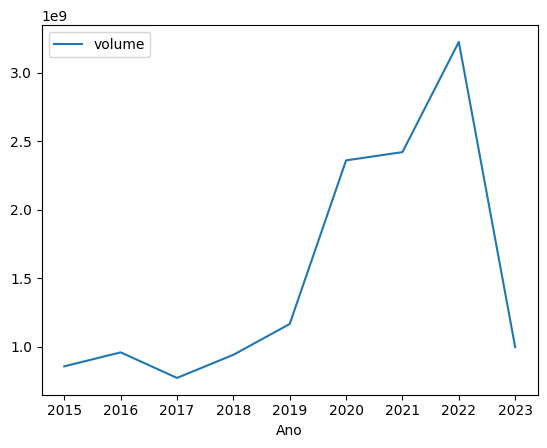

In [ ]:
ibov_yf[['volume','Ano']].groupby(['Ano']).sum().plot();

Precisamos lembrar que os dados de 2023 estao incompletos

In [ ]:
ibov_yf[ibov_yf.Ano != 2023]  #excluindo 2023 da analise

,open,high,low,close,volume,resultado,result_binario,resultado_tres,dia_semana,Ano,Mes,Mes_numerico
Date,,,,,,,,,,,,
2015-01-05,48512,48512,47264,47517,3866100,-2.051039,negativo,negativo,Monday,2015,January,1
2015-01-06,47517,48061,47338,48001,4559300,1.018583,positivo,maior_que_1%,Tuesday,2015,January,1
2015-01-07,48006,49882,48006,49463,4408800,3.045770,positivo,maior_que_1%,Wednesday,2015,January,1
2015-01-08,49463,50261,49017,49943,3621900,0.970422,positivo,zero_a_1%,Thursday,2015,January,1
2015-01-09,49955,49955,48501,48840,2999200,-2.208518,negativo,negativo,Friday,2015,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,107552,109994,107552,109698,12847100,2.218661,positivo,maior_que_1%,Friday,2022,December,12
2022-12-26,109699,109755,108309,108738,5219500,-0.875130,negativo,negativo,Monday,2022,December,12
2022-12-27,108739,109353,107418,108347,11158100,-0.359580,negativo,negativo,Tuesday,2022,December,12


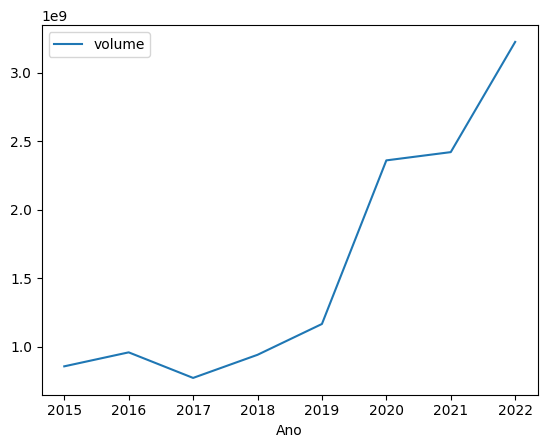

In [ ]:
ibov_yf[ibov_yf.Ano != 2023][['volume','Ano']].groupby(['Ano']).sum().plot();

Separando o conjunto de dados por grupos

In [ ]:
ibov_yf_ano = ibov_yf.groupby('Ano')['resultado']

In [ ]:
ibov_yf_ano.get_group(2023)  #pegando um grupo especifico

Date
2023-01-02   -3.321791
2023-01-03   -2.077536
2023-01-04    1.121287
2023-01-05    2.073405
2023-01-06    1.225841
                ...   
2023-04-18    0.138658
2023-04-19   -2.119382
2023-04-20    0.436904
2023-04-24   -0.402426
2023-04-25   -0.699395
Name: resultado, Length: 78, dtype: float64

Aplicando funções

Vamos calcular o coeficiente de variação (desvio / média, expresso em valor absoluto e %)

In [ ]:
#  coeficiente de variação (desvio / média, expresso em valor absoluto e %

In [ ]:
np.array([1,2,3,4])

array([1, 2, 3, 4])

In [ ]:
np.array([1,2,3,4]).std()

1.118033988749895

In [ ]:
np.array([1,2,3,4]).mean()

2.5

In [ ]:
np.array([1,2,3,4]).std()/np.array([1,2,3,4]).mean()*100

44.721359549995796

In [ ]:
def coef_variacao(x):
  y = abs((x.std()/x.mean())*100)
  return y

In [ ]:
coef_variacao(np.array([1,2,3,4]))

44.721359549995796

Por fim, aplicando funções no groupby

Vamos calcular o coeficiente de variação (desvio / média, expresso em valor absoluto e %) para os resultados diários separando os dados em dias positivos e negativos

In [ ]:
ibov_yf.groupby(['result_binario']).apply(coef_variacao)

<ipython-input-112-97bfe7f82e89>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y = abs((x.std()/x.mean())*100)
<ipython-input-112-97bfe7f82e89>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y = abs((x.std()/x.mean())*100)
<ipython-input-112-97bfe7f82e89>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning

,open,high,low,close,volume,resultado,Ano,Mes_numerico
result_binario,,,,,,,,
negativo,29.366511,29.339696,29.473437,29.441465,63.762653,109.513104,0.121994,54.378805
positivo,28.886377,28.735283,28.901932,28.778012,63.498300,93.430629,0.116724,54.029014


In [ ]:
ibov_yf.groupby(['result_binario']).apply(lambda x: abs((x.resultado.std()/x.resultado.mean())*100) )
#aplicando função ja criada como função de agregação

result_binario
negativo    109.513104
positivo     93.430629
dtype: float64

Aplicando um teste estatístico para cada grupo. Nesse caso calcularemos a normalidade dos dados, mas não se preocupe com o teste em si pois será abordado no módulos de estatística

In [ ]:
from scipy import stats

O jeito mais lento seria fazer filtros pra cada grupo de resultado binário

In [ ]:
ibov_yf[ibov_yf.result_binario =='positivo']['volume'] #forma tradcicional no python

Date
2015-01-06     4559300
2015-01-07     4408800
2015-01-08     3621900
2015-01-15     4463600
2015-01-16     3344900
                ...   
2023-04-10     8148700
2023-04-11    18725700
2023-04-12    17345500
2023-04-18    11207900
2023-04-20    12378000
Name: volume, Length: 1071, dtype: int64

In [ ]:
stats.normaltest(ibov_yf[ibov_yf.result_binario =='positivo']['volume']).pvalue

7.482887267751796e-28

In [ ]:
stats.normaltest(ibov_yf[ibov_yf.result_binario =='negativo']['volume']).pvalue

7.784569709076769e-30

Basicamente agrupar os dados de retornos por mes e aplicar a função do teste de normalidade, retornando apenas o p valor

Imagine se tivesse vários grupos o quanto pode salvar tempo

In [ ]:
ibov_yf[['volume','result_binario']].groupby('result_binario').agg(lambda x: stats.normaltest(x).pvalue)

,volume
result_binario,
negativo,7.784570e-30
positivo,7.482887e-28
